<a href="https://colab.research.google.com/github/SaqlainHussainShah/implementation-of-sdi/blob/master/Clustering_%2B_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Details of Notebook

1.   Reading CSV
2.   Data Selection
3.   Algorithms Implemented
> 1. K Means Clustering
> 2. DBSCAN
> 3. Hierarchical Clustering
4. Time Series

In [0]:
#Importing Necessary Modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.metrics import accuracy_score

### 1. Reading CSV

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:

df=pd.read_csv("/content/drive/My Drive/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")



In [35]:
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.12-192.168.10.50-35396-22-6,192.168.10.12,35396,192.168.10.50,22,6,7/7/2017 1:00,1266342,41,44,2664,6954,456,0,64.975610,109.864573,976,0,158.045455,312.675250,7595.10464,67.12246771,15075.50000,104051.399700,948537.0,0.0,1266342.0,31658.550,159355.2595,996324.0,2.0,317671.0,7387.697674,19636.44809,104616.0,1.0,0,0,0,0,...,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,0,1,113.152941,64.975610,158.045455,1328,0,0,0,0,0,0,41,2664,44,6954,29200,243,24,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.16-192.168.10.50-60058-22-6,192.168.10.16,60058,192.168.10.50,22,6,7/7/2017 1:00,1319353,41,44,2664,6954,456,0,64.975610,109.864573,976,0,158.045455,312.675250,7289.93681,64.42551766,15706.58333,104861.870100,955790.0,1.0,1319353.0,32983.825,159247.9008,996423.0,1.0,363429.0,8451.837209,21337.26261,104815.0,1.0,0,0,0,0,...,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,0,1,113.152941,64.975610,158.045455,1328,0,0,0,0,0,0,41,2664,44,6954,29200,243,24,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,192.168.10.12-192.168.10.50-35396-22-6,192.168.10.12,35396,192.168.10.50,22,6,7/7/2017 1:00,160,1,1,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0,12500,160.00000,0.000000,160.0,160.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0,0,0,0,...,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,0,1,0.000000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,1,0,290,243,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,192.168.10.12-192.168.10.50-35398-22-6,192.168.10.12,35398,192.168.10.50,22,6,7/7/2017 1:00,1303488,41,42,2728,6634,456,0,66.536585,110.129945,976,0,157.952381,319.121427,7182.267884,63.6753081,15896.19512,106554.899000,956551.0,0.0,1303488.0,32587.200,160397.0499,997357.0,1.0,346851.0,8459.780488,23962.23892,138295.0,0.0,0,0,0,0,...,976,111.452381,241.642792,58391.23867,0,0,0,1,0,0,0,0,1,112.795181,66.536585,157.952381,1328,0,0,0,0,0,0,41,2728,42,6634,29200,243,24,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,192.168.10.12-192.168.10.50-35396-22-6,192.168.10.50,22,192.168.10.12,35396,6,7/7/2017 1:00,77,1,2,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0,38961.03896,38.50000,14.849242,49.0,28.0,0.0,0.000,0.0000,0.0,0.0,49.0,49.000000,0.00000,49.0,49.0,0,0,0,0,...,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,0,2,0.000000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,2,0,243,290,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [36]:
df.groupby(' Label').first()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BENIGN,192.168.10.12-192.168.10.50-35396-22-6,192.168.10.12,35396,192.168.10.50,22,6,7/7/2017 1:00,1266342,41,44,2664,6954,456,0,64.975610,109.864573,976,0,158.045455,312.675250,7595.10464,67.12246771,15075.5,1.040514e+05,948537.0,0.0,1266342.0,31658.55,159355.25950,996324.0,2.0,317671.0,7.387698e+03,1.963645e+04,104616.0,1.0,0,0,0,0,...,0,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,0,1,113.152941,64.975610,158.045455,1328,0,0,0,0,0,0,41,2664,44,6954,29200,243,24,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PortScan,172.16.0.1-192.168.10.50-40620-80-6,172.16.0.1,40620,192.168.10.50,80,6,7/7/2017 1:05,5021059,6,5,703,1414,356,0,117.166667,181.536130,1050,0,282.800000,456.923626,421.6242032,2.190772903,502105.9,1.568379e+06,4965658.0,19.0,55401.0,11080.20,17612.66701,41863.0,19.0,5020928.0,1.255232e+06,2.499940e+06,5005133.0,1053.0,0,0,0,0,...,0,1050,176.416667,317.471103,100787.90150,0,0,0,1,0,0,0,0,0,192.454545,117.166667,282.800000,200,0,0,0,0,0,0,6,703,5,1414,29200,243,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2. Data Selection

In [0]:
df_benign=df[df[' Label']=='BENIGN']

In [38]:
df_benign.groupby(' Label').first()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BENIGN,192.168.10.12-192.168.10.50-35396-22-6,192.168.10.12,35396,192.168.10.50,22,6,7/7/2017 1:00,1266342,41,44,2664,6954,456,0,64.97561,109.864573,976,0,158.045455,312.67525,7595.10464,67.12246771,15075.5,104051.3997,948537.0,0.0,1266342.0,31658.55,159355.2595,996324.0,2.0,317671.0,7387.697674,19636.44809,104616.0,1.0,0,0,0,0,...,0,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,0,1,113.152941,64.97561,158.045455,1328,0,0,0,0,0,0,41,2664,44,6954,29200,243,24,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
df_port_scan=df[df[' Label']=='PortScan']

In [40]:
df_port_scan.groupby(' Label').first()


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
Label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PortScan,172.16.0.1-192.168.10.50-40620-80-6,172.16.0.1,40620,192.168.10.50,80,6,7/7/2017 1:05,5021059,6,5,703,1414,356,0,117.166667,181.53613,1050,0,282.8,456.923626,421.6242032,2.190772903,502105.9,1568379.157,4965658.0,19.0,55401.0,11080.2,17612.66701,41863.0,19.0,5020928.0,1255232.0,2499939.593,5005133.0,1053.0,0,0,0,0,...,0,1050,176.416667,317.471103,100787.9015,0,0,0,1,0,0,0,0,0,192.454545,117.166667,282.8,200,0,0,0,0,0,0,6,703,5,1414,29200,243,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
df_port_scan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158930 entries, 1463 to 279088
Data columns (total 85 columns):
Flow ID                         158930 non-null object
 Source IP                      158930 non-null object
 Source Port                    158930 non-null int64
 Destination IP                 158930 non-null object
 Destination Port               158930 non-null int64
 Protocol                       158930 non-null int64
 Timestamp                      158930 non-null object
 Flow Duration                  158930 non-null int64
 Total Fwd Packets              158930 non-null int64
 Total Backward Packets         158930 non-null int64
Total Length of Fwd Packets     158930 non-null int64
 Total Length of Bwd Packets    158930 non-null int64
 Fwd Packet Length Max          158930 non-null int64
 Fwd Packet Length Min          158930 non-null int64
 Fwd Packet Length Mean         158930 non-null float64
 Fwd Packet Length Std          158930 non-null float64
Bwd Packet Len

In [42]:
df_benign[:100]

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.12-192.168.10.50-35396-22-6,192.168.10.12,35396,192.168.10.50,22,6,7/7/2017 1:00,1266342,41,44,2664,6954,456,0,64.975610,109.864573,976,0,158.045455,312.675250,7595.10464,67.12246771,15075.500000,104051.399700,948537.0,0.0,1266342.0,31658.550,159355.2595,996324.0,2.0,317671.0,7387.697674,19636.44809,104616.0,1.0,0,0,0,0,...,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,0,1,113.152941,64.975610,158.045455,1328,0,0,0,0,0,0,41,2664,44,6954,29200,243,24,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.16-192.168.10.50-60058-22-6,192.168.10.16,60058,192.168.10.50,22,6,7/7/2017 1:00,1319353,41,44,2664,6954,456,0,64.975610,109.864573,976,0,158.045455,312.675250,7289.93681,64.42551766,15706.583330,104861.870100,955790.0,1.0,1319353.0,32983.825,159247.9008,996423.0,1.0,363429.0,8451.837209,21337.26261,104815.0,1.0,0,0,0,0,...,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,0,1,113.152941,64.975610,158.045455,1328,0,0,0,0,0,0,41,2664,44,6954,29200,243,24,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,192.168.10.12-192.168.10.50-35396-22-6,192.168.10.12,35396,192.168.10.50,22,6,7/7/2017 1:00,160,1,1,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0,12500,160.000000,0.000000,160.0,160.0,0.0,0.000,0.0000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0,0,0,0,...,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,0,1,0.000000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,1,0,290,243,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,192.168.10.12-192.168.10.50-35398-22-6,192.168.10.12,35398,192.168.10.50,22,6,7/7/2017 1:00,1303488,41,42,2728,6634,456,0,66.536585,110.129945,976,0,157.952381,319.121427,7182.267884,63.6753081,15896.195120,106554.899000,956551.0,0.0,1303488.0,32587.200,160397.0499,997357.0,1.0,346851.0,8459.780488,23962.23892,138295.0,0.0,0,0,0,0,...,976,111.452381,241.642792,58391.23867,0,0,0,1,0,0,0,0,1,112.795181,66.536585,157.952381,1328,0,0,0,0,0,0,41,2728,42,6634,29200,243,24,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,192.168.10.12-192.168.10.50-35396-22-6,192.168.10.50,22,192.168.10.12,35396,6,7/7/2017 1:00,77,1,2,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0,38961.03896,38.500000,14.849242,49.0,28.0,0.0,0.000,0.0000,0.0,0.0,49.0,49.000000,0.00000,49.0,49.0,0,0,0,0,...,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,0,2,0.000000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,2,0,243,290,0,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,192.168.10.3

In [0]:
df=pd.concat([df[:512],df_port_scan[:512]])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1024 entries, 0 to 87926
Data columns (total 85 columns):
Flow ID                         1024 non-null object
 Source IP                      1024 non-null object
 Source Port                    1024 non-null int64
 Destination IP                 1024 non-null object
 Destination Port               1024 non-null int64
 Protocol                       1024 non-null int64
 Timestamp                      1024 non-null object
 Flow Duration                  1024 non-null int64
 Total Fwd Packets              1024 non-null int64
 Total Backward Packets         1024 non-null int64
Total Length of Fwd Packets     1024 non-null int64
 Total Length of Bwd Packets    1024 non-null int64
 Fwd Packet Length Max          1024 non-null int64
 Fwd Packet Length Min          1024 non-null int64
 Fwd Packet Length Mean         1024 non-null float64
 Fwd Packet Length Std          1024 non-null float64
Bwd Packet Length Max           1024 non-null int64


In [45]:
df.columns

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

In [0]:
df=df[[' Timestamp','Total Length of Fwd Packets',' Total Length of Bwd Packets',' Label']]
X=df[['Total Length of Fwd Packets',' Total Length of Bwd Packets']]
X_time=df[[' Timestamp','Total Length of Fwd Packets',' Total Length of Bwd Packets']]
y=df[[' Label']]

### 3. Algorithms Implemented

##### K Means Clustering

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
from sklearn.cluster import KMeans

In [0]:
def kmeans(X, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    km = KMeans(n_clusters=n_clusters)
    km.fit(X)
    y_pred = km.predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("K-means")

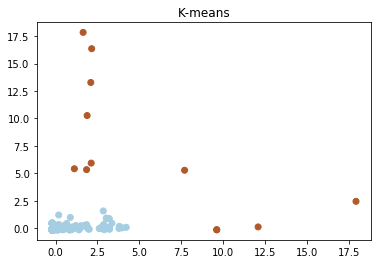

In [24]:
kmeans(X,n_clusters=2)

##### DBSCAN

In [0]:
from sklearn.cluster import DBSCAN

In [0]:
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")

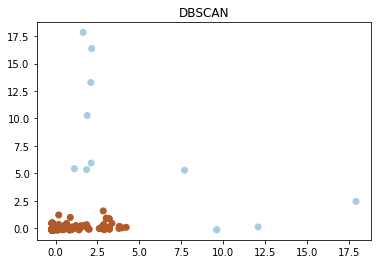

In [27]:
dbscan(X,eps=2.3,min_samples=128)

##### Hierarchical Clustering

In [0]:
from sklearn.cluster import AgglomerativeClustering

In [0]:
def hier(X, n_clusters):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    hier = AgglomerativeClustering(n_clusters=n_clusters)
    y_pred = hier.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("Hierarchical")

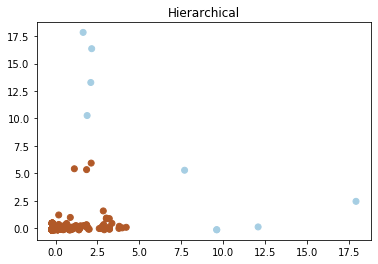

In [30]:
hier(X,n_clusters=2)

### 4. Time Series

In [0]:
X_time.set_index(' Timestamp', inplace=True)
X_time.index = pd.to_datetime(X_time.index)

In [49]:
X_time.head()

,Total Length of Fwd Packets,Total Length of Bwd Packets
Timestamp,,
2017-07-07 01:00:00,2664,6954
2017-07-07 01:00:00,2664,6954
2017-07-07 01:00:00,0,0
2017-07-07 01:00:00,2728,6634
2017-07-07 01:00:00,0,0


In [0]:
X_time_five_minutes=X_time.between_time('1:55:00', '2:00:00')